In [2]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm import *

%matplotlib inline

s-channel production:
```
import model DMsimp_s_spin1

define dq = d b s
define dq = d~ b~ s~

generate p p > xd xd~

output zprime_direct
```

t-channel production:
```
import semivisible_sid

define dq = d b s
define dq~ = d~ b~ s~
define gv = gv11 gv12 gv21 gv22
define gv~ = gv11~ gv12~ gv21~ gv22
define sq = sd11 sd12 sd21 sd22 ss11 ss12 ss21 ss22 sb11 sb12 sb21 sb22
define sq~ = sd11~ sd12~ sd21~ sd22~ ss11~ ss12~ ss21~ ss22~ sb11~ sb12~ sb21~ sb22
define dj = g d b s
define dj~ = g d~ b~ s~

generate p p > gv gv~
add process p p > gv gv~ dj
add process p p > gv gv~ dj dj~

output tchannel_total
```

Changes to make:
```
1.000000e+00 # MW -> Auto # MW
1.000000e+03 # Ms -> <PhiMass> # Ms
30.0   = xqcut -> 100.0   = xqcut
False  = cut_decays -> True  = cut_decays
Zprime: double coupling 2.000000e+00 # gVXd 
```

In [180]:
def pT(p):
    """Get pT from LHE file"""
    return np.sqrt(getattr(e.particles[-1],'px')**2 + getattr(e.particles[-1],'py')**2)

m_ary = [500,1000,2000,3000,5000,10000,20000,100000]

In [181]:
colors = ['cornflowerblue','forestgreen','maroon','goldenrod','gray','mediumseagreen','brown','black']
rcParams['figure.figsize'] = 9,5

In [182]:
nevts = 10000
pT_ary_tch = np.zeros((len(m_ary), nevts))

for im, m in tqdm(enumerate(m_ary)):
    for ie, e in enumerate(pylhe.readLHE('../MG5_aMC_v2_5_2/bin/tchannel_wtf_pp_'+str(m)+'/Events/run_02/unweighted_events.lhe')):
#     for ie, e in enumerate(pylhe.readLHE('../MG5_aMC_v2_5_2/bin/tchannel_total_'+str(m)+'/Events/run_01/unweighted_events.lhe')):
        if ie == nevts: break
        pT_ary_tch[im, ie] = (pT(e.particles[-1]))

8it [00:12,  1.60s/it]


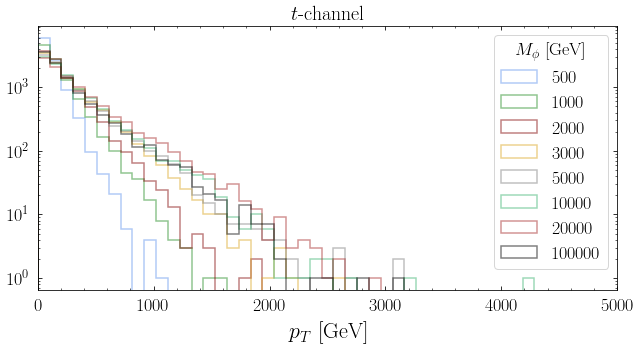

In [189]:
for im, m in enumerate(m_ary):
    plt.hist(pT_ary_tch[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label=str(m), color=colors[im]);
plt.yscale("log")
plt.xlabel(r'$p_T$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_\phi$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
plt.title("$t$-channel",fontsize=20)
plt.tight_layout()
plt.savefig("mtchParton.pdf")

In [190]:
nevts = 10000
pT_ary_Zp = np.zeros((len(m_ary), nevts))

for im, m in tqdm(enumerate(m_ary)):
    for ie, e in enumerate(pylhe.readLHE('../MG5_aMC_v2_5_2/bin/zprime_wtf_pp_'+str(m)+'/Events/run_02/unweighted_events.lhe')):
        pT_ary_Zp[im, ie] = (pT(e.particles[-1]))

8it [00:13,  1.73s/it]


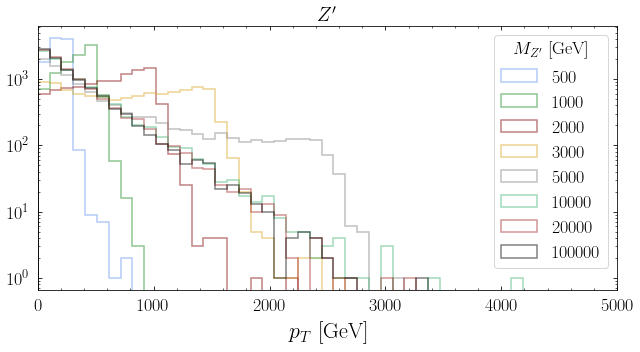

In [191]:
for im, m in enumerate(m_ary):
    plt.hist(pT_ary_Zp[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label=str(m), color=colors[im]);
plt.yscale("log")
plt.xlabel(r'$p_T$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_{Z^\prime}$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
plt.title("$Z^\prime$",fontsize=20)
plt.tight_layout()
plt.savefig("mZpParton.pdf")

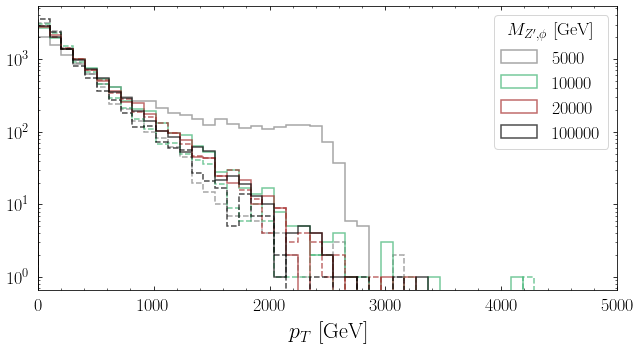

In [199]:
for im, m in enumerate(m_ary):
    if im > 3:
        plt.hist(pT_ary_tch[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.7,lw=1.5, ls='--', color=colors[im]);
        plt.hist(pT_ary_Zp[im], histtype='step', bins = np.linspace(0,5000,50),alpha=.7,lw=1.5, label=str(m), color=colors[im]);


plt.yscale("log")
plt.xlabel(r'$p_T$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_{Z^\prime,\phi}$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
# plt.title("$M_{Z^\prime,\phi}=10$ TeV",fontsize=20)
plt.tight_layout()
plt.savefig("mZptchParton.pdf")

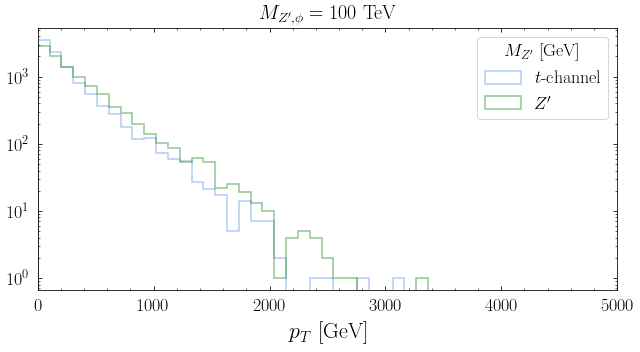

In [200]:
plt.hist(pT_ary_tch[-1], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label="$t$-channel");
plt.hist(pT_ary_Zp[-1], histtype='step', bins = np.linspace(0,5000,50),alpha=.5,lw=1.5, label="$Z^\prime$");


plt.yscale("log")
plt.xlabel(r'$p_T$ [GeV]')
plt.xlim(0,5000)
legend = plt.legend(title="$M_{Z^\prime}$ [GeV]");
plt.setp(legend.get_title(),fontsize=18)
plt.title("$M_{Z^\prime,\phi}=100$ TeV",fontsize=20)
plt.tight_layout()
plt.savefig("mZptch100TeVParton.pdf")

In [92]:
! ls ../MG5_aMC_v2_5_2/bin/zprime_direct_nowidth_1000*

ls: cannot access ../MG5_aMC_v2_5_2/bin/zprime_direct_nowidth_1000*: No such file or directory
